## Importing Libraries of conv_visualiser package

In [1]:
from cnn_visualiser import GRAD_CAM
from cnn_visualiser import GradVisualiser
from cnn_visualiser import IntermediateActivations
from cnn_visualiser import VanillaGradients

## Importing Necessary packages 

In [2]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Making Image  model ready
Preprocessing Images

In [3]:
path = "./Input_Images/cat_dog.png" #path to image
vgg_model = vgg16.VGG16(weights = 'imagenet',input_shape=(224,224,3),include_top=True)
img = image.load_img(path,target_size=(224,224)) #make sure the dimensions of the image matches with the input_shape
img = image.img_to_array(img)
img = preprocess_input(img) #make sure the image is preprocessed
img = np.expand_dims(img,axis = 0)# adding a batch dimension

## Generating heatmaps and outputs mention in GRAD CAM paper
### reference https://arxiv.org/abs/1610.02391

In [4]:
grad_cam = GRAD_CAM(model=vgg_model,input_image=img,layer_name='block5_conv3')
superimposed_image = grad_cam.get_superimposed(path) #heatmap superimposed on the original image

### All the outputs are stored in the path mentioned

In [5]:
cv2.imwrite('./Output/superimposed_image.png',superimposed_image)#Saving the image

True

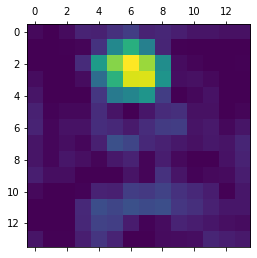

In [6]:
heatmap = grad_cam.get_heat_map()
plt.matshow(heatmap)

In [7]:
guided_grads_cam = grad_cam.get_guided_grad_cam()
cv2.imwrite('./Output/guided_grads_cam.png',guided_grads_cam)

True

## Generating gradients using Guided Backpropagtion Algorithm

In [8]:
grad_visualiser = GradVisualiser(model=vgg_model,layer_name='block4_conv3',input_image=img)

In [9]:
guided_grads = grad_visualiser.guided_gradients()

In [10]:
cv2.imwrite('./Output/guided_grads.png',guided_grads)

True

## Generating intermediate filters using Gradient Ascent Algorithm

In [20]:
vg = VanillaGradients(model = vgg_model,input_image = img)
filter_pattern = vg.generate_filter_pattern(filter_index=10,layer_name = 'block2_conv1',input_height=224,input_width=224)

In [21]:
cv2.imwrite('./Output/filter_pattern.png',filter_pattern)

True

In [22]:
grads = vg.vanilla_gradients(class_label = 245)

In [23]:
cv2.imwrite("./Output/vanilla_grads.png",grads)

True

## Generating intermediate activation functions

### warning mention layer_names in layer directory in a sequence of a particular block

/home/rachit/Projects/conv_visualiser/cnn_visualiser/intermediate_activations.py:42: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


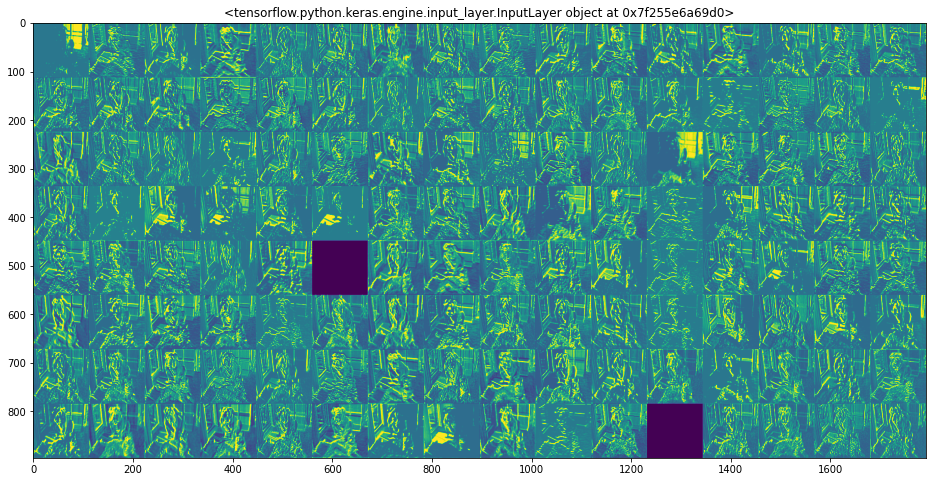

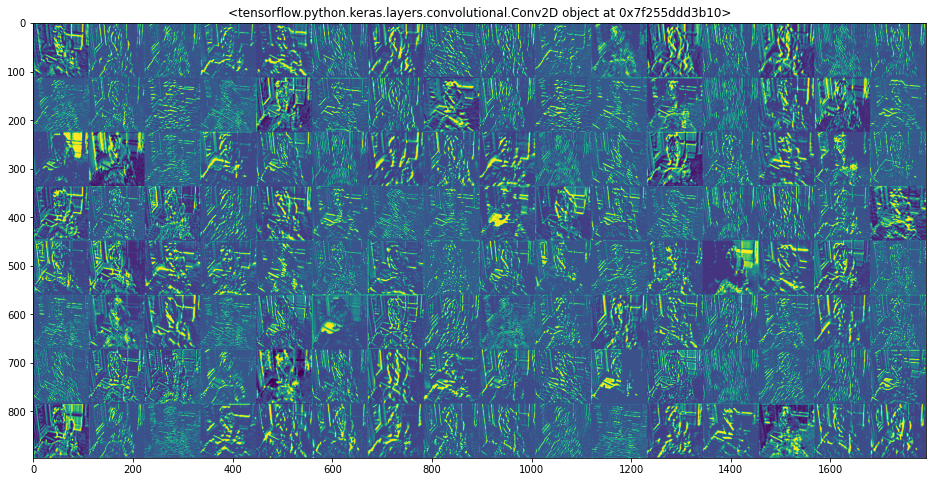

In [24]:
ia = IntermediateActivations(model=vgg_model,layer_names = ['block2_conv1','block2_conv2'])
ia.display_grid(input_image=img) #Matplotlib Plot

In [25]:
ia.display_single_channel(intput_image =)

TypeError: display_single_channel() missing 1 required positional argument: 'input_image'

In [ ]:
cv2.imwrite("./Output/vanilla_grads.png",grads)